<a href="https://colab.research.google.com/github/RickyMacharm/Cassava/blob/master/Cassava_Disease02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Cassava/'


In [0]:
import os
os.chdir('/content/gdrive/My Drive')

In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

In [0]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw------- 1 root root 67 Mar 21 14:54 kaggle.json


In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


# **Time to load the Fastai Library**

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path = Path(base_dir + 'data/images/train/')

path.mkdir(parents=True, exist_ok=True)

In [0]:
# Lets check and see the files that ready for us to use
path.ls()

[PosixPath('/content/gdrive/My Drive/Cassava/data/images/train/cgm'),
 PosixPath('/content/gdrive/My Drive/Cassava/data/images/train/cmd'),
 PosixPath('/content/gdrive/My Drive/Cassava/data/images/train/healthy'),
 PosixPath('/content/gdrive/My Drive/Cassava/data/images/train/cbb'),
 PosixPath('/content/gdrive/My Drive/Cassava/data/images/train/cbsd'),
 PosixPath('/content/gdrive/My Drive/Cassava/data/images/train/models'),
 PosixPath('/content/gdrive/My Drive/Cassava/data/images/train/.ipynb_checkpoints'),
 PosixPath('/content/gdrive/My Drive/Cassava/data/images/train/submission.csv'),
 PosixPath('/content/gdrive/My Drive/Cassava/data/images/train/submission02.csv'),
 PosixPath('/content/gdrive/My Drive/Cassava/data/images/train/export.pkl')]

In [0]:
classes = ['cgm','cmd', 'healthy', 'cbb', 'cbsd']

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

cgm


cmd


healthy


cbb


cbsd


In [0]:
np.random.seed(44)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(flip_vert=True), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cbb', 'cbsd', 'cgm', 'cmd', 'healthy'], 5, 4525, 1131)

In [0]:
print(data.classes)
len(data.classes),data.c

['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']


(5, 5)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:02<00:00, 49403196.19it/s]


# **start the training process**

We want to find the learning rate (LR) using the LR_Finder

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


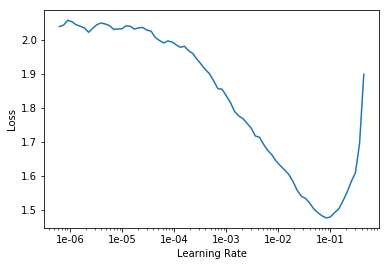

In [0]:
learn.recorder.plot()

we can see our optimum Learning Rate as = 0.01. Let us go ahead and fit our model

In [0]:
lr = 0.0015

In [0]:
learn.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,accuracy,time
0,1.207446,0.854188,0.725022,03:44
1,0.876500,0.599048,0.809903,01:44
2,0.655450,0.540715,0.818744,01:43
3,0.549404,0.483639,0.840849,01:44
4,0.497892,0.483029,0.841733,01:44


In [0]:
learn.save('Resnet50-001')


In [0]:

learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


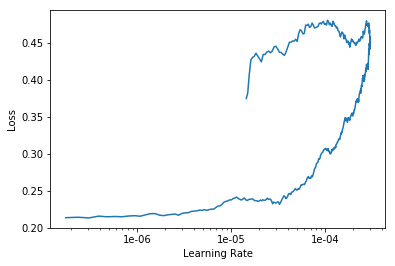

In [0]:

learn.recorder.plot()#suggestion=True)

In [0]:

learn.fit_one_cycle(8, max_lr=slice(3.5e-07, lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.206486,0.425683,0.870911,01:49
1,0.201233,0.437394,0.865606,01:52
2,0.199040,0.460862,0.866490,01:52
3,0.194876,0.446829,0.872679,01:51
4,0.177295,0.453330,0.873563,01:50
5,0.160148,0.478543,0.869142,01:51
6,0.162606,0.473521,0.871795,01:51
7,0.146860,0.471561,0.863837,01:50


In [0]:
learn.save('Resnet50-002')

In [0]:
learn.fit_one_cycle(6,1.7e-05)

epoch,train_loss,valid_loss,accuracy,time
0,0.146178,0.463127,0.871795,01:52
1,0.155649,0.460295,0.870911,01:51
2,0.155894,0.462824,0.870027,01:51
3,0.143587,0.455037,0.871795,01:51
4,0.130143,0.457268,0.867374,01:51
5,0.120309,0.456329,0.872679,01:51


In [0]:
learn.save('Resnet50-003')

In [0]:
learn.fit_one_cycle(6, max_lr=slice(3.6e-06, lr/3))

epoch,train_loss,valid_loss,accuracy,time
0,0.129814,0.465476,0.871795,01:50
1,0.160329,0.537865,0.862953,01:51
2,0.182137,0.475995,0.866490,01:51
3,0.145202,0.489893,0.871795,01:51
4,0.114945,0.491095,0.875332,01:51
5,0.112710,0.488403,0.877100,01:51


In [0]:
learn.save('Resnet50-004')

In [0]:
learn.fit_one_cycle(6, (1.3e-7)/7)

epoch,train_loss,valid_loss,accuracy,time
0,0.094464,0.481543,0.879752,01:52
1,0.093090,0.490016,0.875332,01:52
2,0.092712,0.493577,0.872679,01:50
3,0.099695,0.484848,0.877984,01:51
4,0.100858,0.485251,0.878868,01:51
5,0.092187,0.482559,0.882405,01:51


In [0]:
learn.save('Resnet50-005')

In [0]:
learn.fit_one_cycle(3, max_lr=slice(1.6e-08, lr/100))

epoch,train_loss,valid_loss,accuracy,time
0,0.096759,0.487520,0.876216,01:51
1,0.099236,0.484069,0.880637,01:51
2,0.092551,0.487872,0.877984,01:52


In [0]:
learn.save('Resnet50-006')

In [0]:
learn.fit_one_cycle(7,max_lr=slice(3e-06,1e-05))

epoch,train_loss,valid_loss,accuracy,time
0,0.286758,0.404639,0.869142,01:52
1,0.291061,0.403309,0.873563,01:51
2,0.283075,0.407094,0.873563,01:51
3,0.271363,0.402245,0.871795,01:53
4,0.267814,0.405559,0.877984,01:53
5,0.268355,0.407605,0.875332,01:51
6,0.269909,0.402853,0.874447,01:55


In [0]:
learn.save('Resnet50-009')

In [0]:
learn.fit_one_cycle(4, max_lr=slice(1.7e-04, 3e-05))

epoch,train_loss,valid_loss,accuracy,time
0,0.076598,0.503154,0.873563,01:51
1,0.134553,0.526622,0.854996,01:52
2,0.107696,0.496921,0.879752,01:51
3,0.079566,0.476178,0.880637,01:51


In [0]:
learn.save('Resnet50-007')

In [0]:
learn.fit_one_cycle(7, slice(3.7e-05, 5e-06))

epoch,train_loss,valid_loss,accuracy,time
0,0.058550,0.474989,0.882405,01:51
1,0.058341,0.473877,0.883289,01:51
2,0.057907,0.470319,0.881521,01:52
3,0.058280,0.481877,0.881521,01:51
4,0.048925,0.477750,0.885057,01:50
5,0.043738,0.471648,0.883289,01:52
6,0.046532,0.472660,0.883289,01:52


In [0]:
learn.save('Resnet50-008')

In [0]:
!ls

 Cassava		     Kaggle	        SwineHealth
'Colab Notebooks'	     kaggle.json        template_new.csv
 CV			     submission10.csv   webinar-files.zip
 Food_Classification.ipynb   submission11.csv


In [0]:
path1 = Path(base_dir + 'data/images/')
#sample_sub = path1/'Sample_Submission.csv'
#labels = path/'traininglabels.csv'

In [0]:
path11 = Path(base_dir + 'data/images/test')

# **We are now testing our Algorithm**

In [0]:
learn.load('Resnet101-08')

Learner(data=ImageDataBunch;

Train: LabelList (4525 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cgm,cgm,cgm,cgm,cgm
Path: /content/gdrive/My Drive/Cassava/data/images/train;

Valid: LabelList (1131 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cmd,cbsd,cmd,cbsd,cbsd
Path: /content/gdrive/My Drive/Cassava/data/images/train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e

# **Pickle File**

In [0]:
learn.export()

# **Make Predictions**

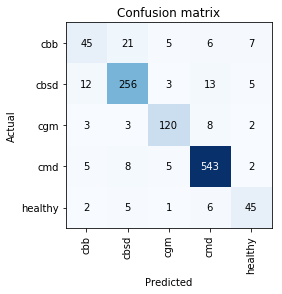

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [0]:
interp.most_confused(min_val=2)

[('cbb', 'cbsd', 21),
 ('cbsd', 'cmd', 13),
 ('cbsd', 'cbb', 12),
 ('cgm', 'cmd', 8),
 ('cmd', 'cbsd', 8),
 ('cbb', 'healthy', 7),
 ('cbb', 'cmd', 6),
 ('healthy', 'cmd', 6),
 ('cbb', 'cgm', 5),
 ('cbsd', 'healthy', 5),
 ('cmd', 'cbb', 5),
 ('cmd', 'cgm', 5),
 ('healthy', 'cbsd', 5),
 ('cbsd', 'cgm', 3),
 ('cgm', 'cbb', 3),
 ('cgm', 'cbsd', 3),
 ('cgm', 'healthy', 2),
 ('cmd', 'healthy', 2),
 ('healthy', 'cbb', 2)]

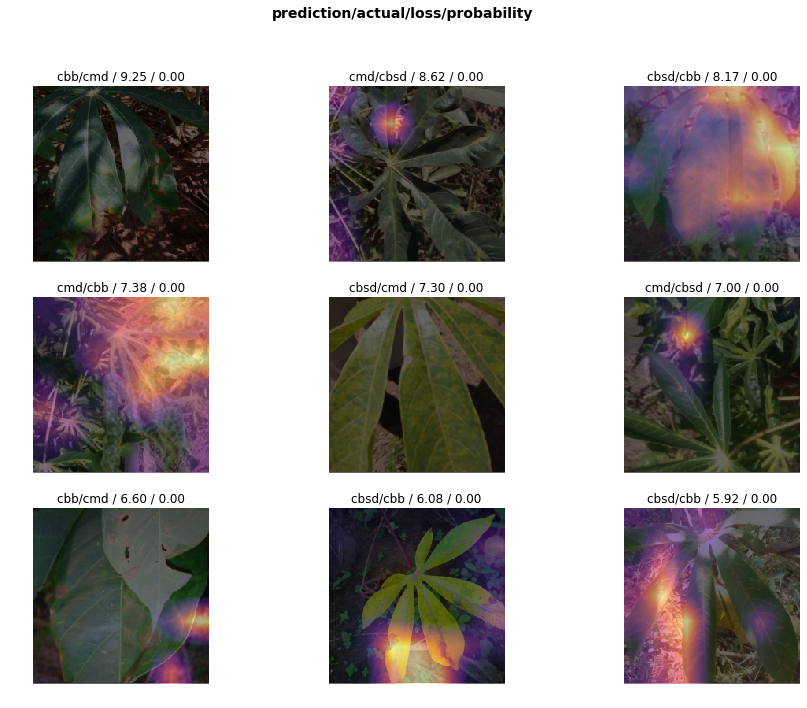

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
test = ImageList.from_folder(path11/'0')
len(test)

3774

In [0]:
learn = load_learner(path, test=test)
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
fnames = [f.name[:] for f in learn.data.test_ds.items]

In [0]:
#thresh = 0.5
#labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]

In [0]:
labelled_preds = np.argmax(preds, axis=1); labelled_preds[1:10]


tensor([3, 3, 3, 3, 3, 1, 3, 3, 3])

In [0]:
index2labels = {0:'cbb', 1:'cbsd', 2:'cgm', 3:'cmd', 4:'healthy'}

In [0]:
df = pd.DataFrame({'cat':labelled_preds})
df['Category'] = df['cat'].map(index2labels)
df['Id'] = fnames
df.drop(['cat'], axis = 1, inplace = True)
df.head(12)

,Category,Id
0,cmd,test-img-2664.jpg
1,cmd,test-img-2607.jpg
2,cmd,test-img-2637.jpg
3,cmd,test-img-2853.jpg
4,cmd,test-img-2699.jpg
5,cmd,test-img-2745.jpg
6,cbsd,test-img-2805.jpg
7,cmd,test-img-2791.jpg
8,cmd,test-img-2956.jpg
9,cmd,test-img-2782.jpg


In [0]:
#df = pd.DataFrame({'Category':labelled_preds, 'Id':fnames}, columns=['Category', 'Id'])

In [0]:
df.to_csv('submission11.csv', index=False)
#print(df.head(12))

In [0]:
df

,Category,Id
0,cmd,test-img-2664.jpg
1,cmd,test-img-2607.jpg
2,cmd,test-img-2637.jpg
3,cmd,test-img-2853.jpg
4,cmd,test-img-2699.jpg
5,cmd,test-img-2745.jpg
6,cbsd,test-img-2805.jpg
7,cmd,test-img-2791.jpg
8,cmd,test-img-2956.jpg
9,cmd,test-img-2782.jpg


In [0]:
import os
os.chdir('/content/gdrive/My Drive')

In [0]:
!kaggle competitions submit -c cassava-disease -f submission11.csv -m "Message"

Could not find competition - please verify that you entered the correct competition ID and that the competition is still accepting submissions.


In [0]:
!kaggle datasets list

404 - Not Found


In [0]:
!pip install kaggle